In [1]:
Quote = ("Commit to the Lord whatever you do, and he will establish your plans.")
Book = (" Proverbs 16:3")
print(Quote + Book)
print("Notebook written by Milton Abreu! Date: 2020 - 06 - 01")

Commit to the Lord whatever you do, and he will establish your plans. Proverbs 16:3
Notebook written by Milton Abreu! Date: 2020 - 06 - 01


In [2]:
# Libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data and taking a first look
premise1 = pd.read_csv("Hourly_Aksum.csv") # Aksum Residence
premise2 = pd.read_csv("Hourly_Maps.csv") # Maps Residence
premise3 = pd.read_csv("Hourly_Songhai.csv") # Songhai Residence
ALC_Voltage = pd.read_csv("Undervoltage_Events.csv") # Undervoltage Events
#premise3.head(100) # uncomment to take a look at the first 100 rows of the data set
#premise1.columns # uncomment to take a look at the columns names

In [4]:
# Renaming a column that was wrongly labeled/named
premise1 = premise1.rename(columns={x:x.replace('Bule-Phase', 'Blue-Phase') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Bule-Phase', 'Blue-Phase') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Bule-Phase', 'Blue-Phase') for x in premise3.columns})

# Giving clear name to each column based on the premises name
premise1 = premise1.rename(columns={x:x.replace('Phase', 'Phase: Aksum') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Phase', 'Phase: Maps') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Phase', 'Phase: Songhai') for x in premise3.columns})

premise1 = premise1.rename(columns={x:x.replace('Frequence (Hz)', 'Frequency (Hz): Aksum') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Frequence (Hz)', 'Frequency (Hz): Maps') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Frequence (Hz)', 'Frequency (Hz): Songhai') for x in premise3.columns})

premise1 = premise1.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Aksum') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Maps') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Songhai') for x in premise3.columns})

In [5]:
# Converting the date column values to a datetime data type 
premise1['Date'] = pd.to_datetime(premise1['Date'],format='%d/%m/%Y %H:%M')
premise2['Date'] = pd.to_datetime(premise2['Date'],format='%d/%m/%Y %H:%M')
premise3['Date'] = pd.to_datetime(premise3['Date'],format='%d/%m/%Y %H:%M')
#premise3['Date'] # Uncomment to check it out

In [6]:
# Subsetting the data into three groups: Voltage, Current and Frequency

# Getting the voltage
V_1 = premise1.filter(['Voltage Red-Phase: Aksum (V)','Voltage White-Phase: Aksum (V)','Voltage Blue-Phase: Aksum (V)'], axis = 1)
V_2 = premise2.filter(['Voltage Red-Phase: Maps (V)','Voltage White-Phase: Maps (V)','Voltage Blue-Phase: Maps (V)'], axis = 1)
V_3 = premise3.filter(['Voltage Red-Phase: Songhai (V)','Voltage White-Phase: Songhai (V)','Voltage Blue-Phase: Songhai (V)'], axis = 1)
#Voltage.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Voltage.csv') # save it as csv file

# Getting the current
C_1 = premise1.filter(['Current Red-Phase: Aksum (A)','Current White-Phase: Aksum (A)','Current Blue-Phase: Aksum (A)'], axis = 1)
C_2 = premise2.filter(['Current Red-Phase: Maps (A)','Current White-Phase: Maps (A)','Current Blue-Phase: Maps (A)'], axis = 1)
C_3 = premise3.filter(['Current Red-Phase: Songhai (A)','Current White-Phase: Songhai (A)','Current Blue-Phase: Songhai (A)'], axis = 1)
#Current.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Current.csv') # save it as csv file

#Getting the frequency
F_1 = premise1.filter(['Frequency (Hz): Aksum'], axis = 1)
F_2 = premise2.filter(['Frequency (Hz): Maps'], axis = 1)
F_3 = premise3.filter(['Frequency (Hz): Songhai'], axis = 1)
#Frequency.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file     


In [7]:
# Cleaning the data
V_1.index = premise1['Date'];V_2.index = premise1['Date']; V_3.index = premise1['Date']; ALC_Voltage.index = ALC_Voltage['Months'] # Set date as the dataframe indice
V_1 = V_1.replace(0,np.NaN); V_2 = V_2.replace(0,np.NaN); V_3 = V_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
V_1.dropna(axis = 0, how ='any');V_2.dropna(axis = 0, how ='any');V_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

C_1.index = premise1['Date'];C_2.index = premise1['Date']; C_3.index = premise1['Date'] # Set date as the dataframe indice
C_1 = C_1.replace(0,np.NaN); C_2 = C_2.replace(0,np.NaN); C_3 = C_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
C_1.dropna(axis = 0, how ='any');C_2.dropna(axis = 0, how ='any');C_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

F_1.index = premise1['Date']; F_2.index = premise1['Date']; F_3.index = premise1['Date'] # Set date as the dataframe indice
F_1 = F_1.replace(0,np.NaN); F_2 = F_2.replace(0,np.NaN); F_3 = F_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
F_1.dropna(axis = 0, how ='any');F_2.dropna(axis = 0, how ='any');F_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

F_1.eq(0).any() # Checking if there is any cell with a zero value


Frequency (Hz): Aksum    False
dtype: bool

## POWER ANALYSIS - SECTION 0

In [8]:
#Getting the Power
P_1 = premise1.filter(['Total Active Power (kW): Aksum','Active Power Red-Phase: Aksum (kW)','Active Power White-Phase: Aksum (kW)','Active Power Blue-Phase: Aksum (kW)'], axis = 1)
P_2 = premise2.filter(['Total Active Power (kW): Maps', 'Active Power Red-Phase: Maps (kW)','Active Power White-Phase: Maps (kW)','Active Power Blue-Phase: Maps (kW)'], axis = 1)
P_3 = premise3.filter(['Total Active Power (kW): Songhai','Active Power Red-Phase: Songhai (kW)','Active Power White-Phase: Songhai (kW)','Active Power Blue-Phase: Songhai (kW)'], axis = 1)
#P_1.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file   

# Cleaning the data
P_1.index = premise1['Date'];P_2.index = premise1['Date']; P_3.index = premise1['Date']; ALC_Voltage.index = ALC_Voltage['Months'] # Set date as the dataframe indice
P_1 = P_1.replace(0,np.NaN); P_2 = P_2.replace(0,np.NaN); P_3 = P_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
P_1.dropna(axis = 0, how ='any');P_2.dropna(axis = 0, how ='any');P_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'


,Total Active Power (kW): Songhai,Active Power Red-Phase: Songhai (kW),Active Power White-Phase: Songhai (kW),Active Power Blue-Phase: Songhai (kW)
Date,,,,
2019-03-01 00:00:00,27.9,11.2,9.8,6.9
2019-03-01 01:00:00,26.0,10.6,9.2,6.3
2019-03-01 02:00:00,23.2,9.7,8.1,5.3
2019-03-01 03:00:00,17.1,7.7,6.0,3.4
2019-03-01 04:00:00,13.3,6.3,4.9,2.2
...,...,...,...,...
2020-02-29 19:00:00,12.4,6.2,4.8,1.5
2020-02-29 20:00:00,11.5,5.7,4.5,1.3
2020-02-29 21:00:00,17.1,7.8,6.7,2.6


In [9]:
# Grouping the data and subseting it - Initial Analysis
## Group the data by month, and take the mean for each group (i.e. each month)
P_t = P_1.resample('M').sum() # sum of data on montly basis
P_m = P_1.resample('M').mean()# mean of the data on monthly basis

P_t2 = P_2.resample('M').sum() # sum of data on montly basis
P_m2 = P_2.resample('M').mean()# mean of the data on monthly basis

P_t3 = P_3.resample('M').sum() # sum of data on montly basis
P_m3 = P_3.resample('M').mean()# mean of the data on monthly basis

P_ds = P_1.resample('D').sum()# sum of the data on daily basis
P_dm = P_1.resample('D').mean() # mean of the data on daily basis

P_ds2 = P_2.resample('D').sum()# sum of the data on daily basis
P_dm2 = P_2.resample('D').mean() # mean of the data on daily basis

P_ds3 = P_3.resample('D').sum()# sum of the data on daily basis
P_dm3 = P_3.resample('D').mean() # mean of the data on daily basis

P_ws = P_1.resample('W').sum() # sum of the data on weekly basis
P_wm = P_1.resample('W').mean() # mean of the data on weekly basis

P_ws2 = P_2.resample('W').sum()# sum of the data on weekly basis
P_wm2 = P_2.resample('W').mean() # mean of the data on weekly basis

P_ws3 = P_3.resample('W').sum()# sum of the data on weekly basis
P_wm3 = P_3.resample('W').mean() # mean of the data on weekly basis

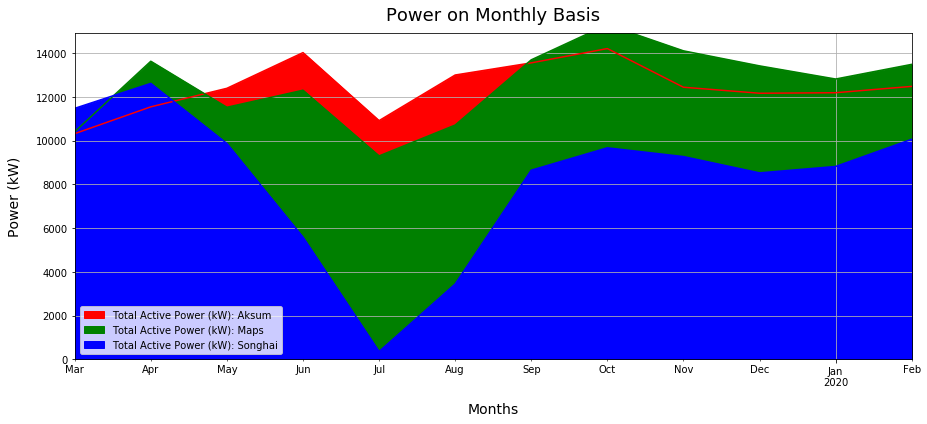

In [10]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Power graphs for sum
P_t.plot(kind='area', y=['Total Active Power (kW): Aksum'], color=['red'], ax=ax)
P_t2.plot(kind='area', y=['Total Active Power (kW): Maps'], color=['green'], ax=ax)
P_t3.plot(kind='area', y=['Total Active Power (kW): Songhai'], color=['blue'], ax=ax)

plt.title("Power on Monthly Basis", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\power_sum1.jpg')# uncomment to save the image


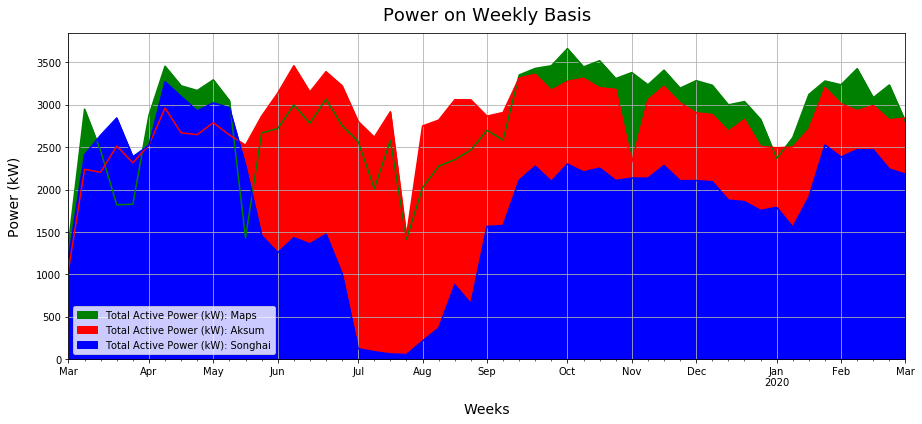

In [11]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Power graphs for sum
P_ws2.plot(kind='area', y=['Total Active Power (kW): Maps'], color=['green'], ax=ax)
P_ws.plot(kind='area', y=['Total Active Power (kW): Aksum'], color=['red'], ax=ax)
P_ws3.plot(kind='area', y=['Total Active Power (kW): Songhai'], color=['blue'], ax=ax)

plt.title("Power on Weekly Basis", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\power_sum1.jpg')# uncomment to save the image


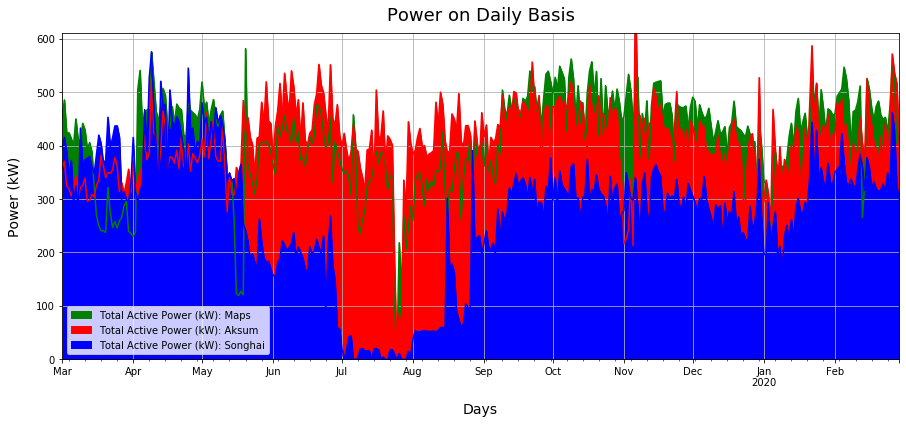

In [12]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Power graphs for sum
P_ds2.plot(kind='area', y=['Total Active Power (kW): Maps'], color=['green'], ax=ax)
P_ds.plot(kind='area', y=['Total Active Power (kW): Aksum'], color=['red'], ax=ax)
P_ds3.plot(kind='area', y=['Total Active Power (kW): Songhai'], color=['blue'], ax=ax)

plt.title("Power on Daily Basis", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\power_sum1.jpg')# uncomment to save the image


In [13]:
P_list = []
A = P_t.sum(); B = P_t2.sum(); C = P_t3.sum()
P_list.append(A['Total Active Power (kW): Aksum'])
P_list.append(B['Total Active Power (kW): Maps'])
P_list.append(C['Total Active Power (kW): Songhai'])

AK_total_P = (4720.20 / P_list[0]) * 100
MA_total_P = (8146.2 / P_list[1]) * 100
SO_total_P = (2496.6/ P_list[2]) * 100

In [14]:
SO_total_P
#P_list[0]
#MA_total_P
#SO_total_P

2.5373369446462957

In [15]:
4720.20 / A[0]

0.03160499712754888

## VOLTAGE ANALYSIS - SECTION 1

In [16]:
# Undervoltage events in a month 
Undervoltage_aksum = V_1[V_1<=216.2].resample('M').count() # Count instances where the voltage is below 216 volts
Undervoltage_maps = V_2[V_2<=216.2].resample('M').count() # Count instances where the voltage is below 216 volts
Undervoltage_songhai = V_3[V_3<=216.2].resample('M').count() # Count instances where the voltage is below 216 volts

# Overvoltage events in a month 
Overvoltage_aksum = V_1[V_1>=243.8].resample('M').count() # Count instances where the voltage is above 253 volts
Overvoltage_maps = V_2[V_2>=243.8].resample('M').count() # Count instances where the voltage is above 253 volts
Overvoltage_songhai = V_3[V_3>=243.8].resample('M').count() # Count instances where the voltage is above 253 volts

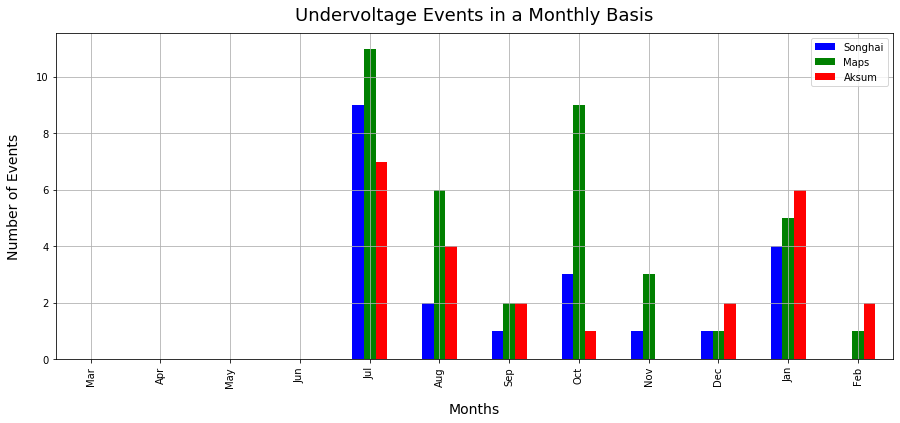

In [17]:
## Remove the comment sign to check the numbers
#Undervoltage_aksum#.sum() # Has 24 Instances of Undervoltage
#Undervoltage_maps#.sum() # Has 38 Instances of Undervoltage
#Undervoltage_songhai#.sum() # Has 21 Instances of Undervoltage

#Overvoltage_aksum.sum() # Zero Instances of Overvoltages 
#Overvoltage_maps#.sum() #  Has 3 Instances of Overvoltages
#Overvoltage_songhai.sum() # Has zero Instances of Overvoltages

fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
ALC_Voltage.plot(kind='bar', y=['Songhai','Maps','Aksum'], color=['Blue', 'Green','Red'], ax=ax)

plt.title("Undervoltage Events in a Monthly Basis", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Number of Events", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Undervoltage_Events2.jpg')# uncomment to save the image


In [18]:
# Grouping the data and subseting it - Initial Analysis
## Group the data by month, and take the mean for each group (i.e. each month)
V_t = V_1.resample('M').sum() # sum of data on montly basis
V_m = V_1.resample('M').mean()# mean of the data on monthly basis

V_t2 = V_2.resample('M').sum() # sum of data on montly basis
V_m2 = V_2.resample('M').mean()# mean of the data on monthly basis

V_t3 = V_3.resample('M').sum() # sum of data on montly basis
V_m3 = V_3.resample('M').mean()# mean of the data on monthly basis

V_ds = V_1.resample('D').sum()# sum of the data on daily basis
V_dm = V_1.resample('D').mean() # mean of the data on daily basis

V_ds2 = V_2.resample('D').sum()# sum of the data on daily basis
V_dm2 = V_2.resample('D').mean() # mean of the data on daily basis

V_ds3 = V_3.resample('D').sum()# sum of the data on daily basis
V_dm3 = V_3.resample('D').mean() # mean of the data on daily basis

V_ws = V_1.resample('W').sum() # sum of the data on weekly basis
V_wm = V_1.resample('W').mean() # mean of the data on weekly basis

V_ws2 = V_2.resample('W').sum()# sum of the data on weekly basis
V_wm2 = V_2.resample('W').mean() # mean of the data on weekly basis

V_ws3 = V_3.resample('W').sum()# sum of the data on weekly basis
V_wm3 = V_3.resample('W').mean() # mean of the data on weekly basis

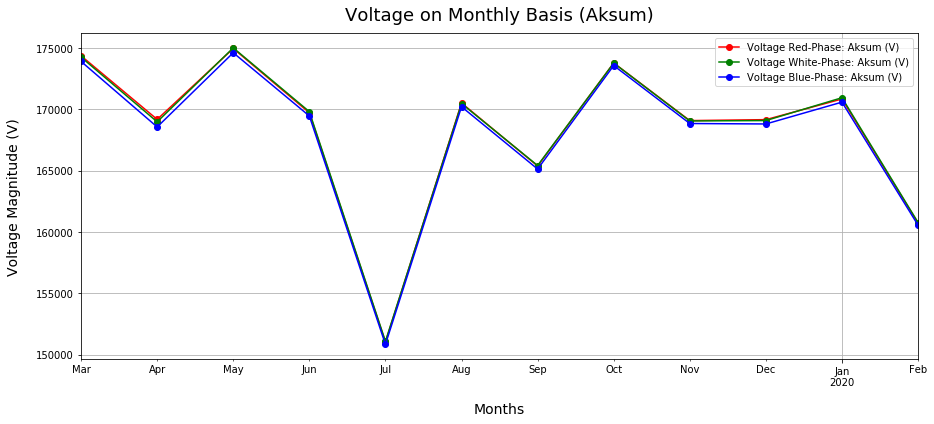

In [19]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_t.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Monthly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


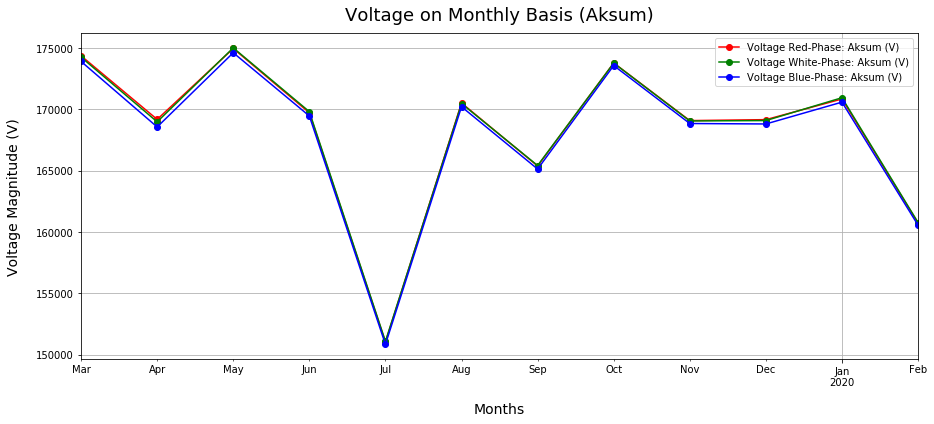

In [20]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_t.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Monthly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


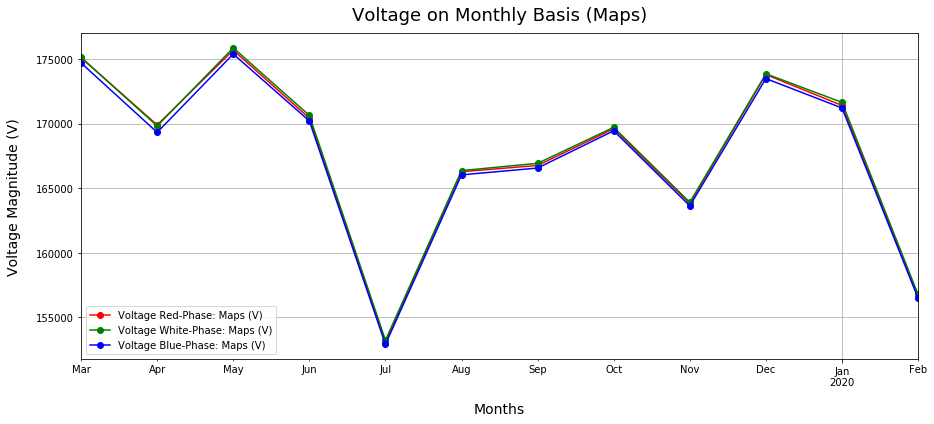

In [21]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

V_t2.plot(kind='line', y=['Voltage Red-Phase: Maps (V)', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V)'], color=['red', 'green','blue'],marker='o', ax=ax)
plt.title("Voltage on Monthly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


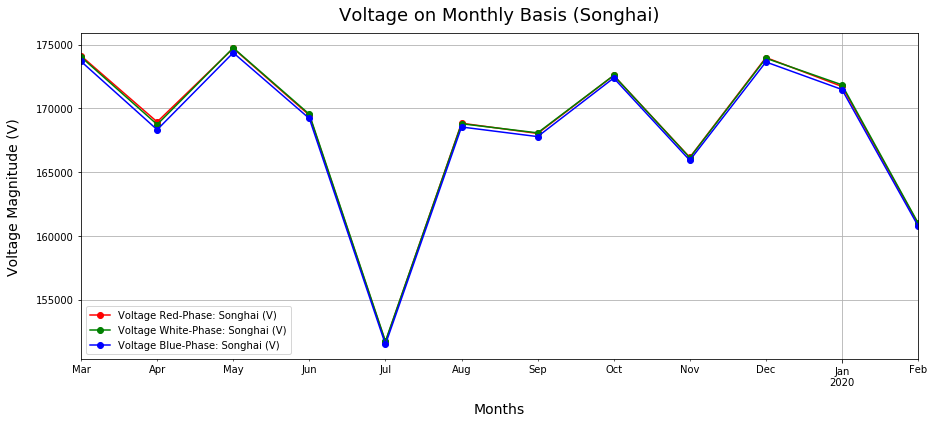

In [22]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis

V_t3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Monthly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


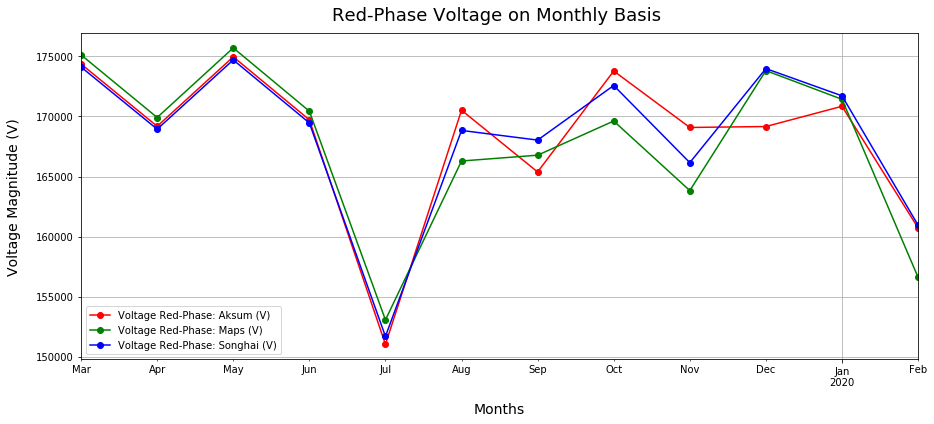

In [23]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_t.plot(kind='line', y='Voltage Red-Phase: Aksum (V)', color='red',marker='o', ax=ax)

V_t2.plot(kind='line', y='Voltage Red-Phase: Maps (V)', color='green',marker='o', ax=ax)

V_t3.plot(kind='line', y='Voltage Red-Phase: Songhai (V)', color='blue',marker='o', ax=ax)


plt.title("Red-Phase Voltage on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


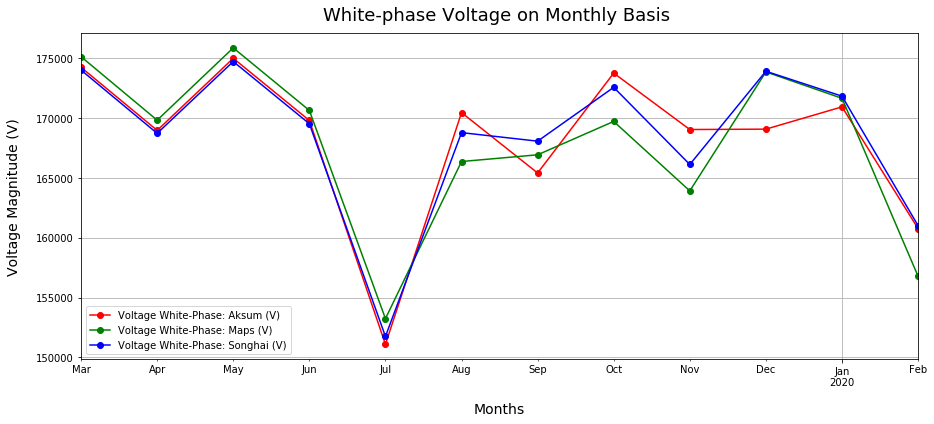

In [24]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_t.plot(kind='line', y='Voltage White-Phase: Aksum (V)', color='red', marker='o', ax=ax)

V_t2.plot(kind='line', y='Voltage White-Phase: Maps (V)', color='green',marker='o', ax=ax)

V_t3.plot(kind='line', y='Voltage White-Phase: Songhai (V)',color='blue',marker='o', ax=ax)

plt.title("White-phase Voltage on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


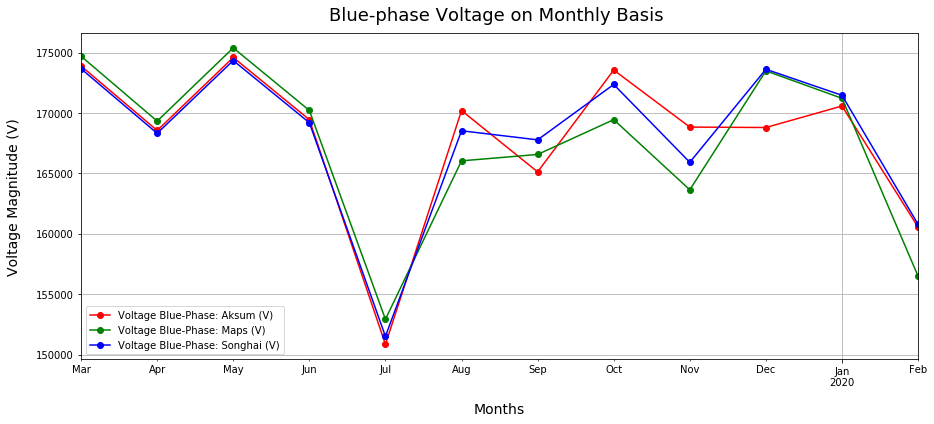

In [25]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
V_t.plot(kind='line', y='Voltage Blue-Phase: Aksum (V)', color='red',marker='o', ax=ax)

V_t2.plot(kind='line', y='Voltage Blue-Phase: Maps (V)', color='green',marker='o', ax=ax)

V_t3.plot(kind='line', y='Voltage Blue-Phase: Songhai (V)', color='blue',marker='o', ax=ax)

plt.title("Blue-phase Voltage on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


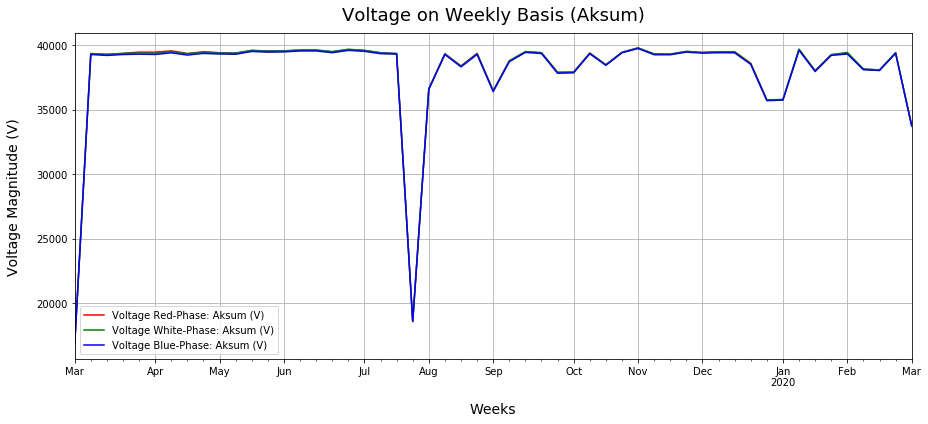

In [26]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_ws.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Voltage on Weekly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


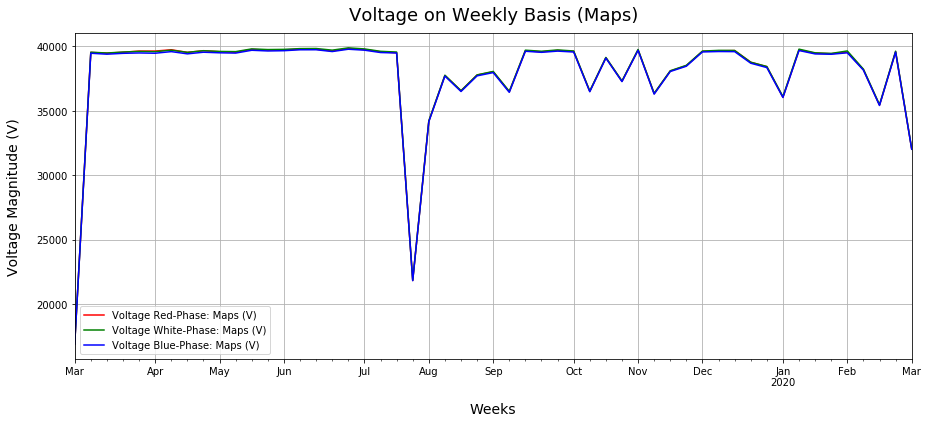

In [27]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_ws2.plot(kind='line', y=['Voltage Red-Phase: Maps (V)', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V)'], color=['red', 'green','blue'], ax=ax)

#V_dws3 = V_3.resample('W').sum()# sum of the data on weekly basis
#V_dwm3 = V_3.resample('W').mean() # mean of the data on weekly basis

plt.title("Voltage on Weekly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


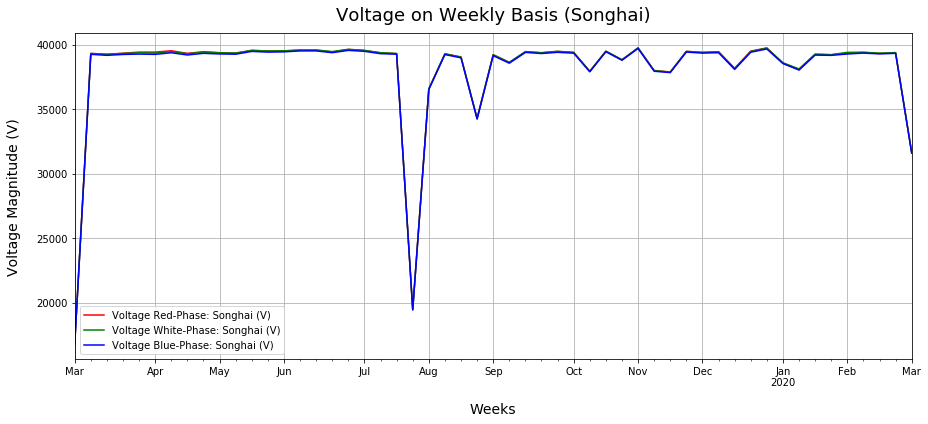

In [28]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_ws3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Voltage on Weekly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


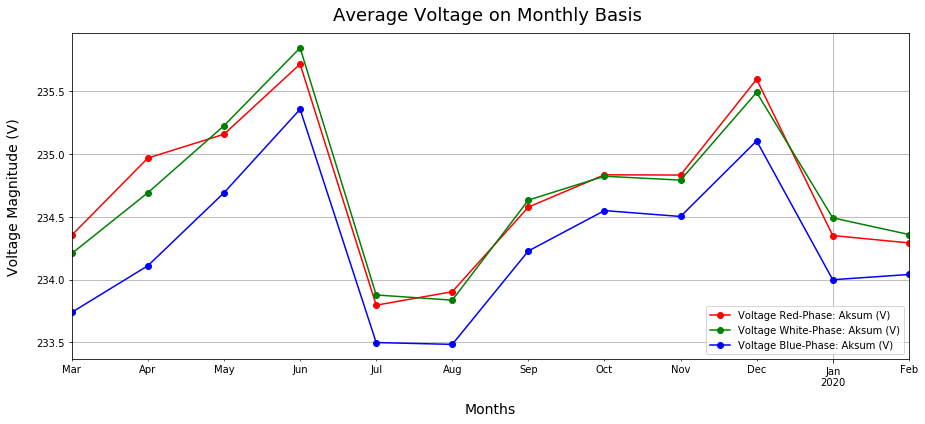

In [29]:
# Plotting and further analysis
plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for average
V_m.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'],marker='o', ax=ax)
plt.title("Average Voltage on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_mean1.jpg')# uncomment to save the image


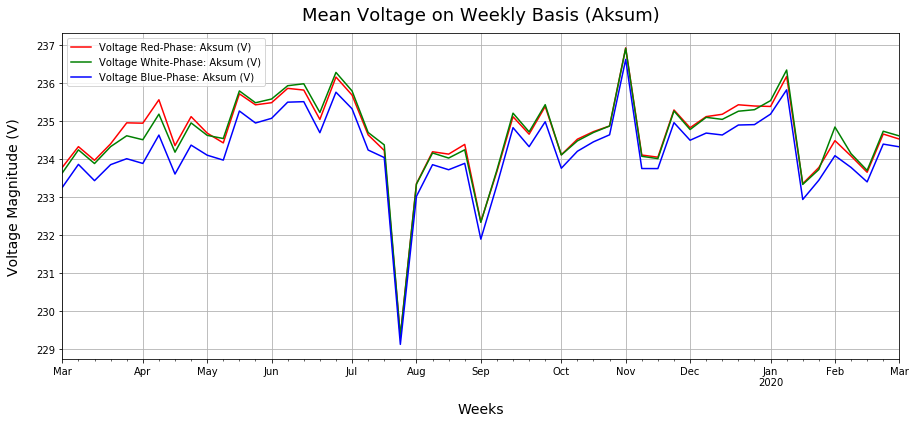

In [30]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_wm.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Mean Voltage on Weekly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


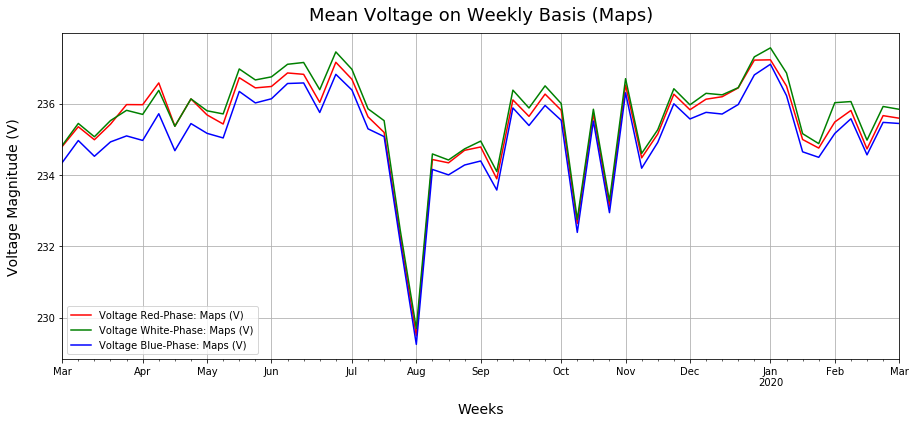

In [31]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_wm2.plot(kind='line', y=['Voltage Red-Phase: Maps (V)', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Mean Voltage on Weekly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


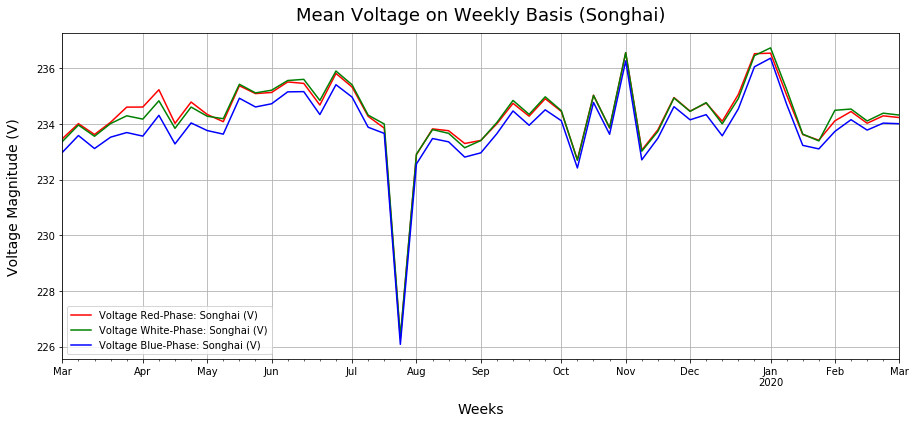

In [32]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_wm3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Mean Voltage on Weekly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

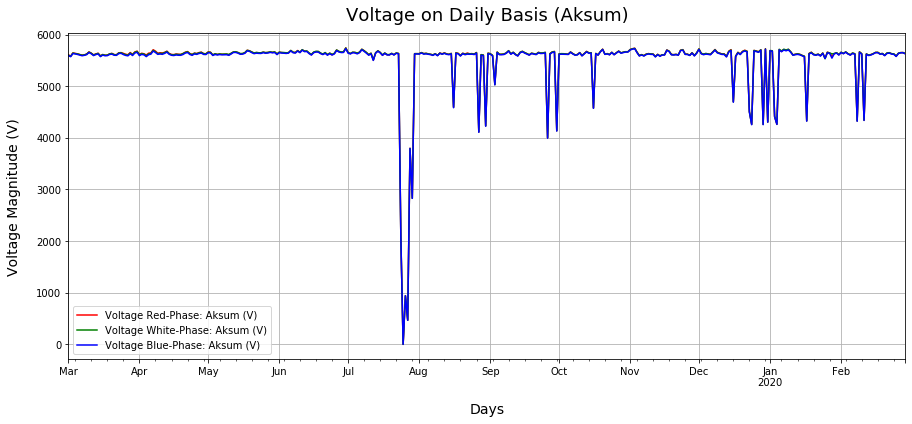

In [33]:
# Plotting and further analysis
plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
V_ds.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'], ax=ax)
plt.title("Voltage on Daily Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sumd1.jpg')# uncomment to save the image


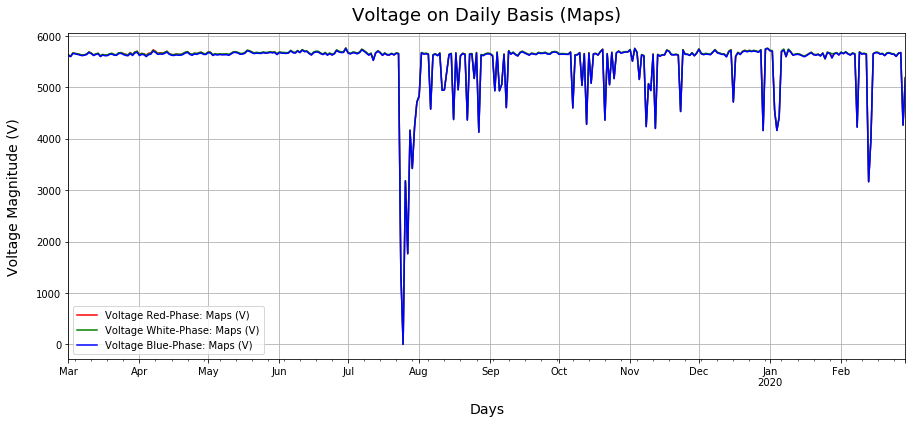

In [34]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_ds2.plot(kind='line', y=['Voltage Red-Phase: Maps (V)', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Voltage on Daily Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


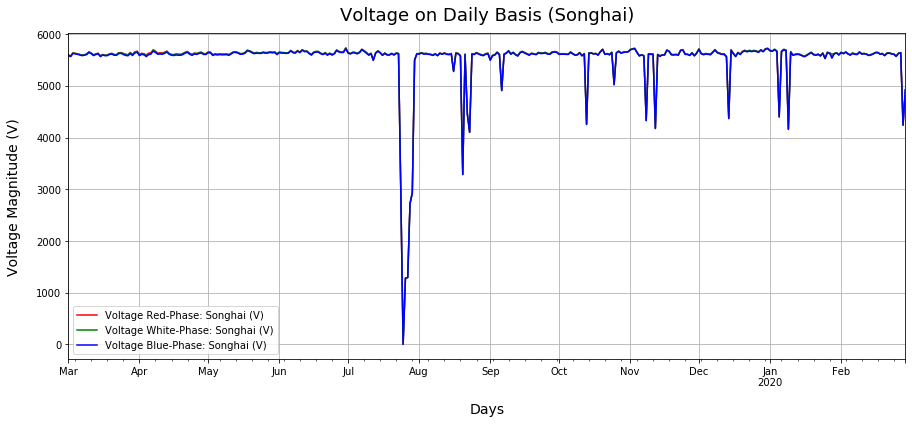

In [35]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
V_ds3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Voltage on Daily Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

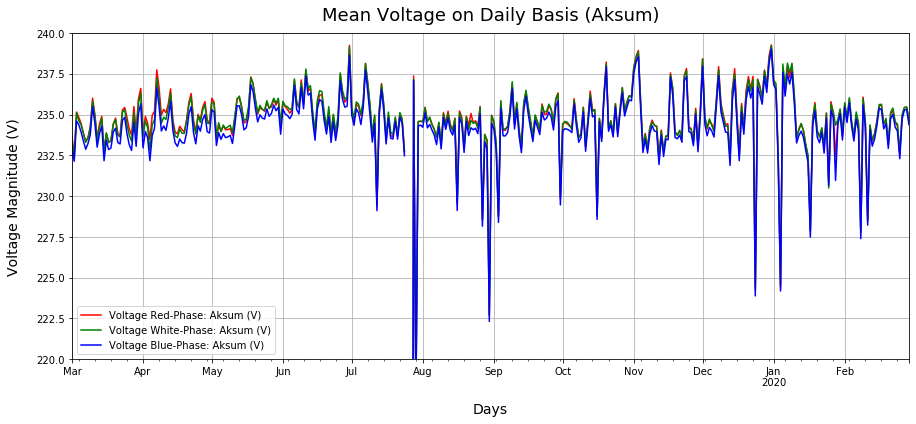

In [36]:
# Plotting and further analysis
plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Plotting the mean of voltages
V_dm.plot(kind='line', y=['Voltage Red-Phase: Aksum (V)', 'Voltage White-Phase: Aksum (V)',
       'Voltage Blue-Phase: Aksum (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Mean Voltage on Daily Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.ylim(220, 240)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_meand1(red).jpg')# uncomment to save the image

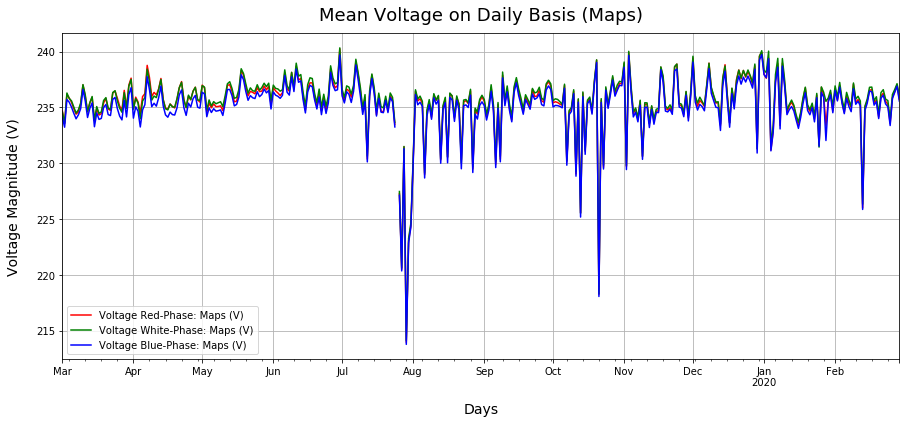

In [37]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_dm2.plot(kind='line', y=['Voltage Red-Phase: Maps (V)', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Mean Voltage on Daily Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

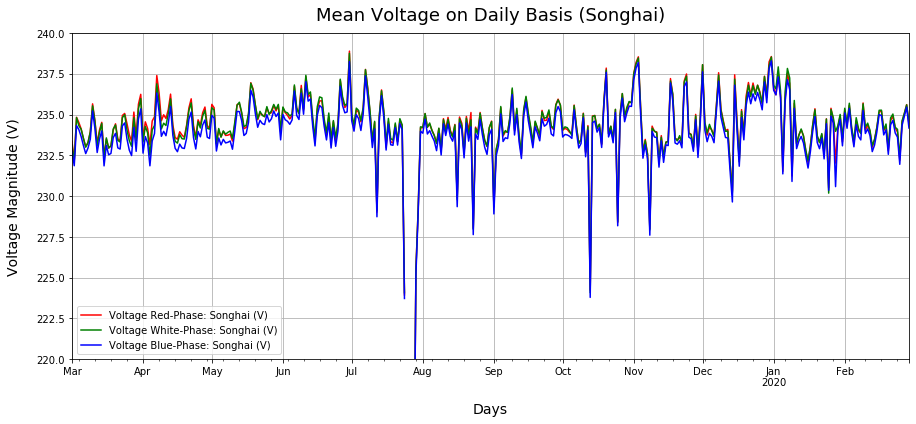

In [38]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
V_dm3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'], ax=ax)

plt.title("Mean Voltage on Daily Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.ylim(220, 240)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

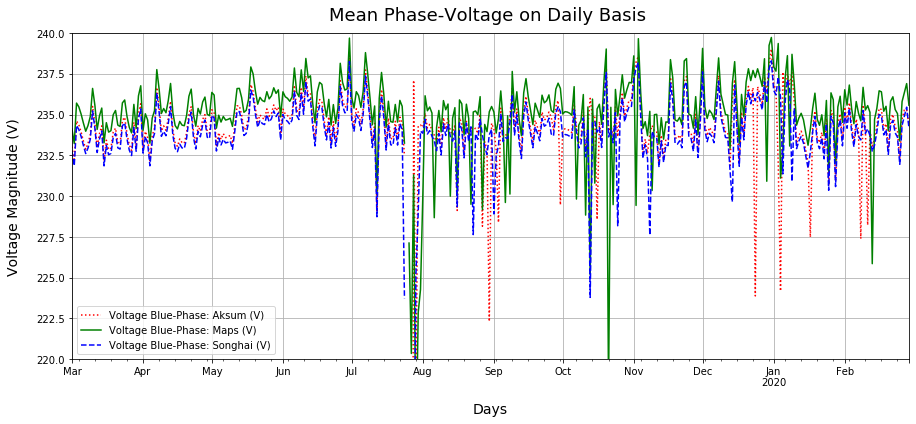

In [39]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for mean
V_dm.plot(kind='line', y='Voltage Blue-Phase: Aksum (V)', color='red',linestyle =':', ax=ax) # discont line

V_dm2.plot(kind='line', y='Voltage Blue-Phase: Maps (V)', color='green',linestyle ='-', ax=ax) # 

V_dm3.plot(kind='line', y='Voltage Blue-Phase: Songhai (V)', color='blue',linestyle ='--', ax=ax)

plt.title("Mean Phase-Voltage on Daily Basis ", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.ylim(220, 240)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


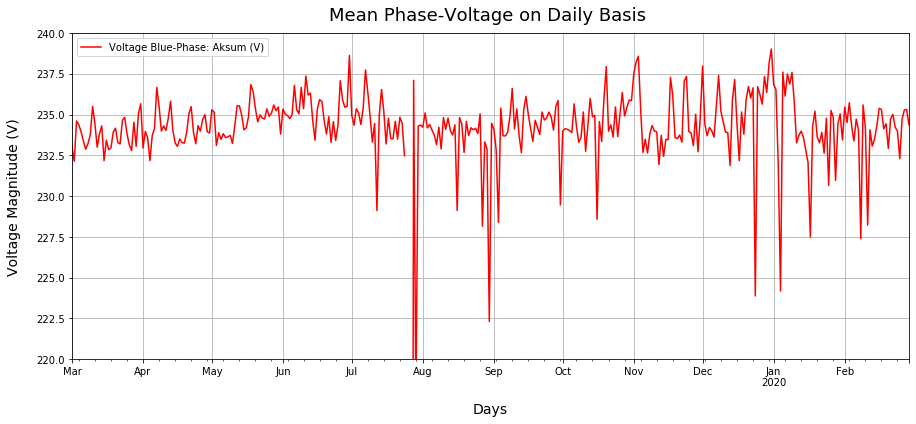

In [40]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for mean
V_dm.plot(kind='line', y='Voltage Blue-Phase: Aksum (V)', color='red', ax=ax)

plt.title("Mean Phase-Voltage on Daily Basis ", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.ylim(220, 240)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


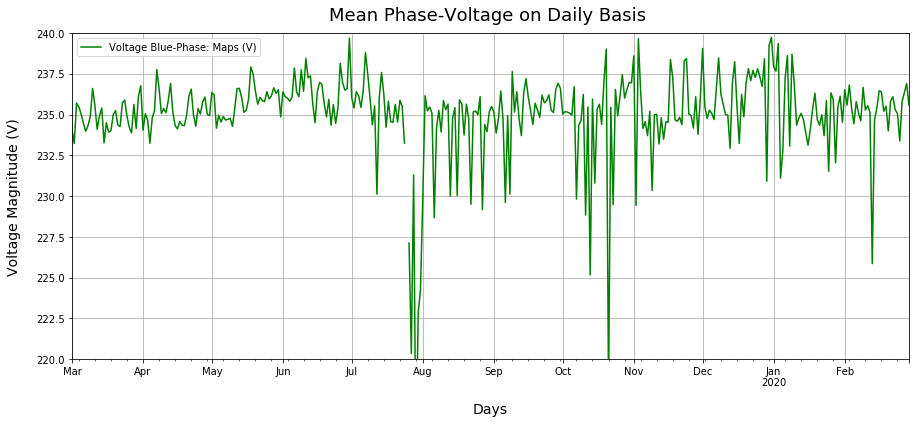

In [41]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for mean
#V_dm.plot(kind='line', y='Voltage Blue-Phase: Aksum (V)', color='red', ax=ax)

V_dm2.plot(kind='line', y='Voltage Blue-Phase: Maps (V)', color='green', ax=ax)

#V_dm3.plot(kind='line', y='Voltage Blue-Phase: Songhai (V)', color='blue', ax=ax)

plt.title("Mean Phase-Voltage on Daily Basis ", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.ylim(220, 240)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


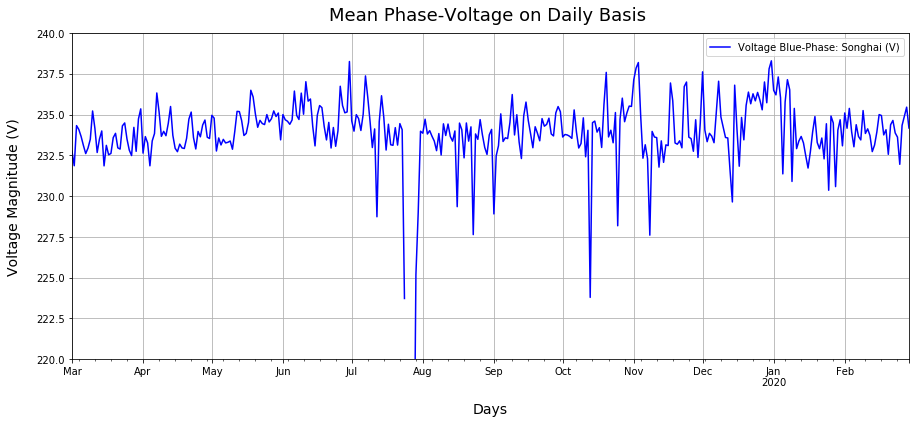

In [42]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

V_dm3.plot(kind='line', y='Voltage Blue-Phase: Songhai (V)', color='blue', ax=ax)

plt.title("Mean Phase-Voltage on Daily Basis ", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)

plt.ylim(220, 240)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


In [43]:
V_1.describe(); V_2.describe(); V_3.describe() # Statistical Summary
V_1.var(); V_2.var(); V_3.var() # Finding the Variance per residence

# Finding the Covariance
#V_1['Voltage Red-Phase: Aksum (V)'].cov(V_2['Voltage Red-Phase: Maps (V)'])
#V_2['Voltage Red-Phase: Maps (V)'].cov(V_3['Voltage Red-Phase: Songhai (V)'])
#V_3['Voltage Red-Phase: Songhai (V)'].cov(V_1['Voltage Red-Phase: Aksum (V)'])
V_1.isnull().any()

Voltage Red-Phase: Aksum (V)      True
Voltage White-Phase: Aksum (V)    True
Voltage Blue-Phase: Aksum (V)     True
dtype: bool

# Current Analysis - Section 2

In [44]:
## Group the data by time period - Initial Analysis
C_t = C_1.resample('M').sum() # sum of data on montly basis
C_m = C_1.resample('M').mean()# mean of the data on monthly basis

C_t2 = C_2.resample('M').sum() # sum of data on montly basis
C_m2 = C_2.resample('M').mean()# mean of the data on monthly basis

C_t3 = C_3.resample('M').sum() # sum of data on montly basis
C_m3 = C_3.resample('M').mean()# mean of the data on monthly basis

C_ds = C_1.resample('D').sum()# sum of the data on daily basis
C_dm = C_1.resample('D').mean() # mean of the data on daily basis

C_ds2 = C_2.resample('D').sum()# sum of the data on daily basis
C_dm2 = C_2.resample('D').mean() # mean of the data on daily basis

C_ds3 = C_3.resample('D').sum()# sum of the data on daily basis
C_dm3 = C_3.resample('D').mean() # mean of the data on daily basis

C_ws = C_1.resample('W').sum() # sum of the data on weekly basis
C_wm = C_1.resample('W').mean() # mean of the data on weekly basis

C_ws2 = C_2.resample('W').sum()# sum of the data on weekly basis
C_wm2 = C_2.resample('W').mean() # mean of the data on weekly basis

C_ws3 = C_3.resample('W').sum()# sum of the data on weekly basis
C_wm3 = C_3.resample('W').mean() # mean of the data on weekly basis

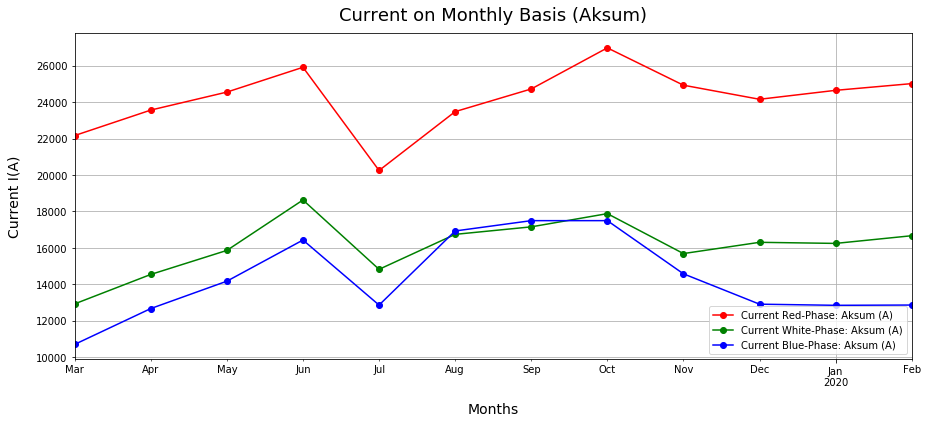

In [45]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
C_t.plot(kind='line', y=['Current Red-Phase: Aksum (A)', 'Current White-Phase: Aksum (A)',
       'Current Blue-Phase: Aksum (A)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Current on Monthly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


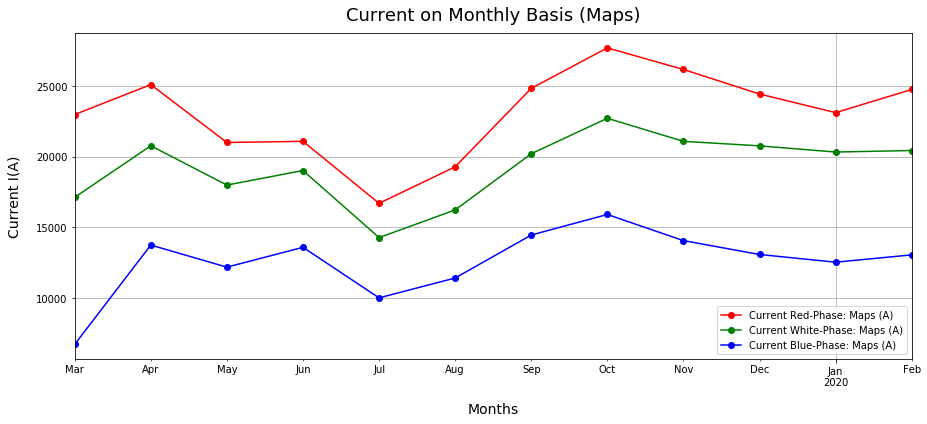

In [46]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
C_t2.plot(kind='line', y=['Current Red-Phase: Maps (A)', 'Current White-Phase: Maps (A)',
       'Current Blue-Phase: Maps (A)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Current on Monthly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


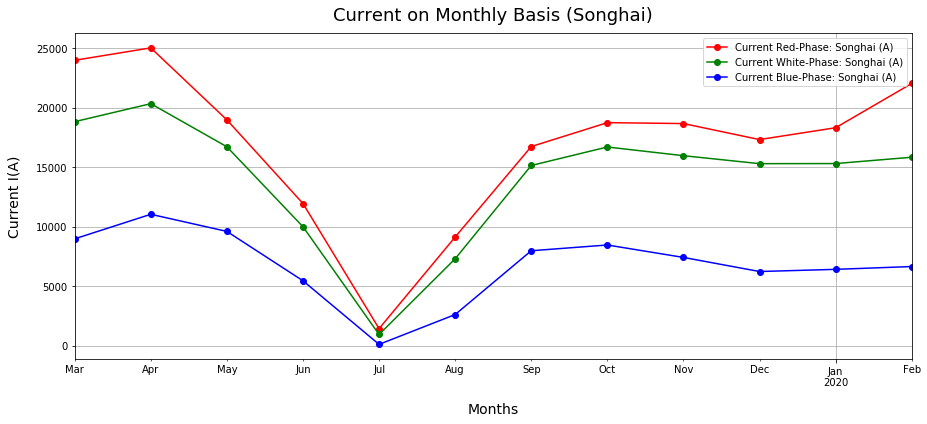

In [47]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
C_t3.plot(kind='line', y=['Current Red-Phase: Songhai (A)', 'Current White-Phase: Songhai (A)',
       'Current Blue-Phase: Songhai (A)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Current on Monthly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


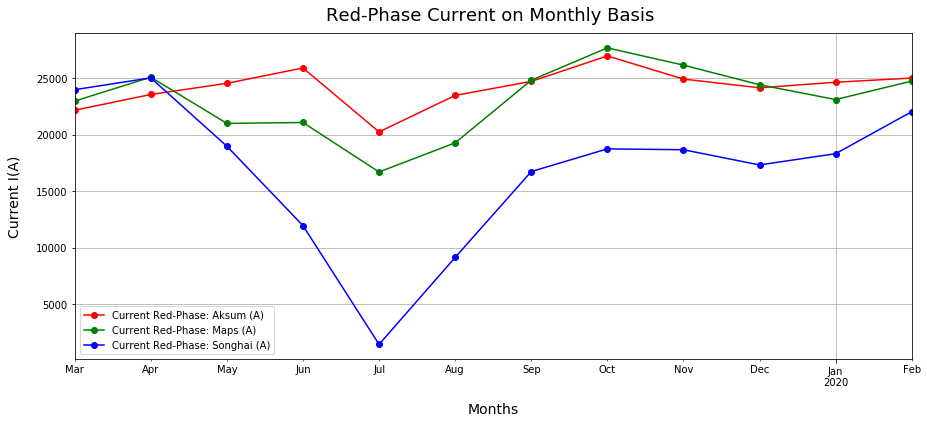

In [48]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
C_t.plot(kind='line', y='Current Red-Phase: Aksum (A)', color='red',marker='o', ax=ax)

C_t2.plot(kind='line', y='Current Red-Phase: Maps (A)', color='green',marker='o', ax=ax)

C_t3.plot(kind='line', y='Current Red-Phase: Songhai (A)', color='blue',marker='o', ax=ax)


plt.title("Red-Phase Current on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


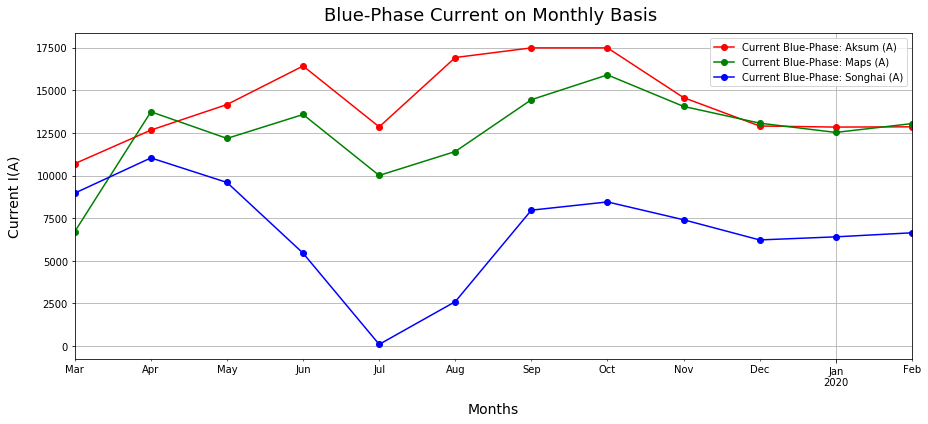

In [49]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
C_t.plot(kind='line', y='Current Blue-Phase: Aksum (A)', color='red',marker='o', ax=ax)

C_t2.plot(kind='line', y='Current Blue-Phase: Maps (A)', color='green',marker='o', ax=ax)

C_t3.plot(kind='line', y='Current Blue-Phase: Songhai (A)', color='blue',marker='o', ax=ax)


plt.title("Blue-Phase Current on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

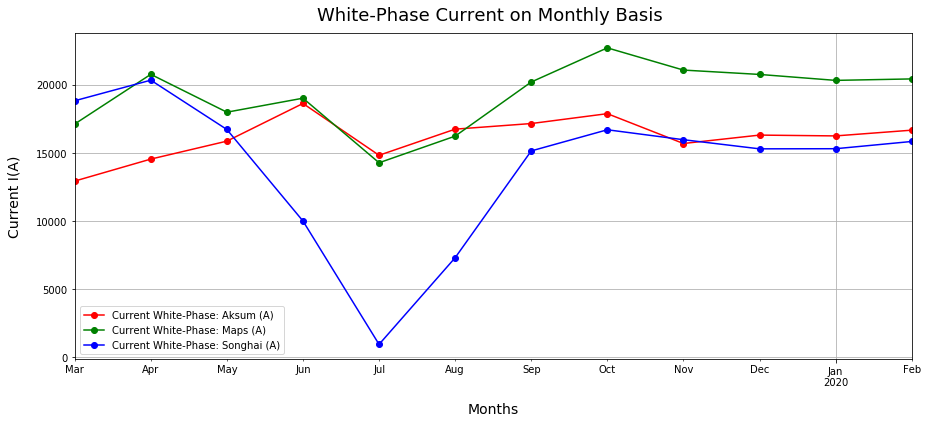

In [50]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
C_t.plot(kind='line', y='Current White-Phase: Aksum (A)', color='red',marker='o', ax=ax)

C_t2.plot(kind='line', y='Current White-Phase: Maps (A)', color='green',marker='o', ax=ax)

C_t3.plot(kind='line', y='Current White-Phase: Songhai (A)', color='blue',marker='o', ax=ax)


plt.title("White-Phase Current on Monthly Basis ", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

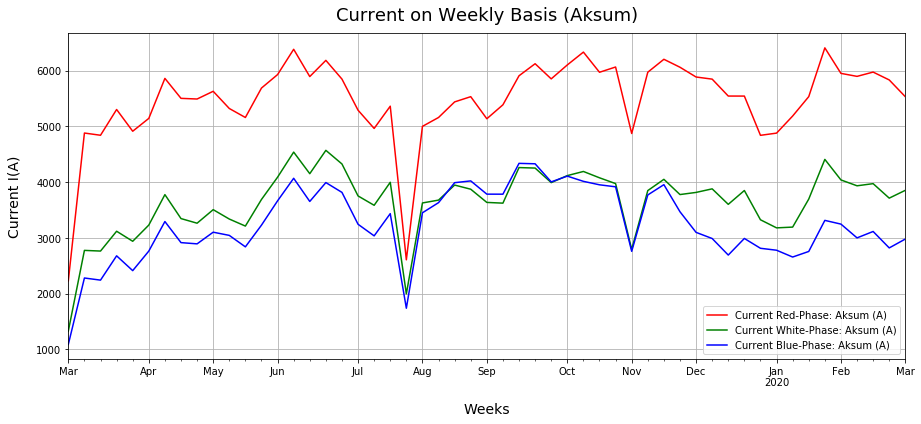

In [51]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
C_ws.plot(kind='line', y=['Current Red-Phase: Aksum (A)', 'Current White-Phase: Aksum (A)',
       'Current Blue-Phase: Aksum (A)'], color=['red', 'green','blue'], ax=ax)

plt.title("Current on Weekly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


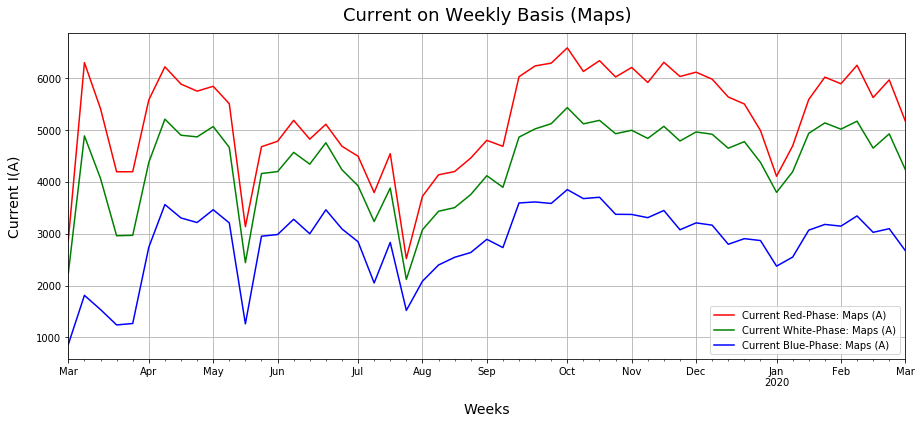

In [52]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
C_ws2.plot(kind='line', y=['Current Red-Phase: Maps (A)', 'Current White-Phase: Maps (A)',
       'Current Blue-Phase: Maps (A)'], color=['red', 'green','blue'], ax=ax)

plt.title("Current on Weekly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

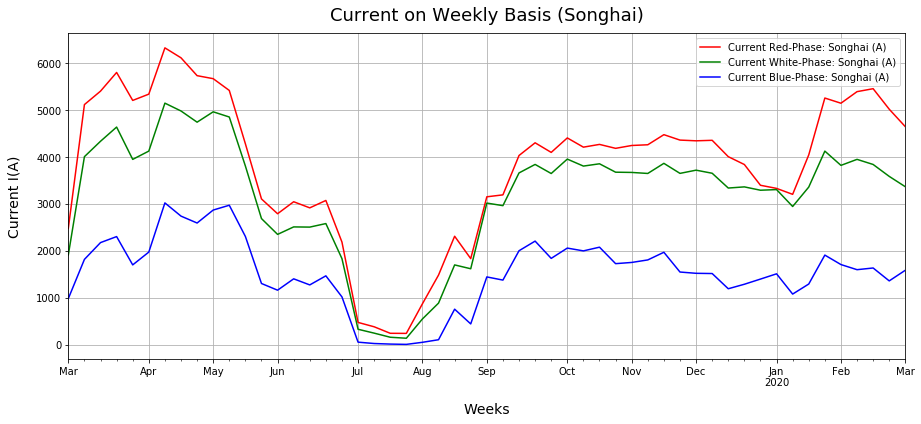

In [53]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Weekly basis - Voltage graphs for sum
C_ws3.plot(kind='line', y=['Current Red-Phase: Songhai (A)', 'Current White-Phase: Songhai (A)',
       'Current Blue-Phase: Songhai (A)'], color=['red', 'green','blue'], ax=ax)

plt.title("Current on Weekly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


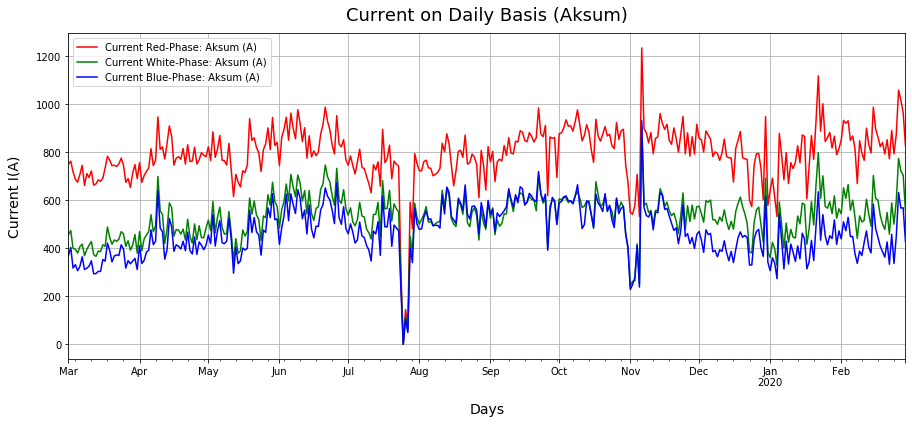

In [54]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
C_ds.plot(kind='line', y=['Current Red-Phase: Aksum (A)', 'Current White-Phase: Aksum (A)',
       'Current Blue-Phase: Aksum (A)'], color=['red', 'green','blue'], ax=ax)

plt.title("Current on Daily Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

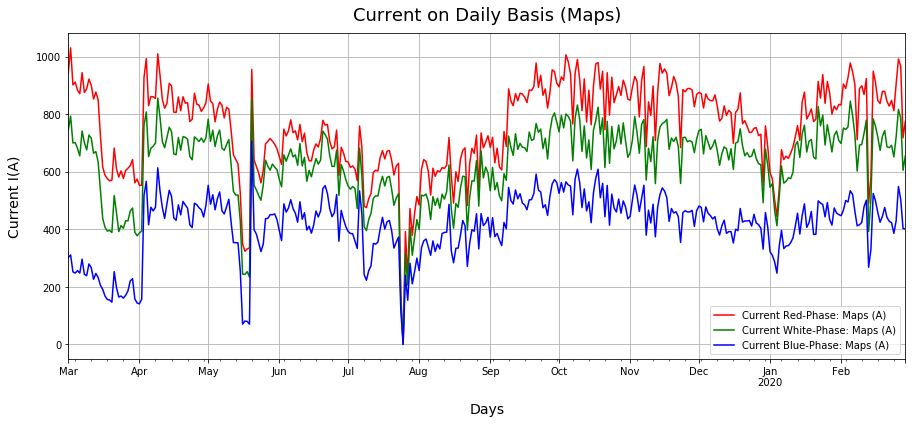

In [55]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
C_ds2.plot(kind='line', y=['Current Red-Phase: Maps (A)', 'Current White-Phase: Maps (A)',
       'Current Blue-Phase: Maps (A)'], color=['red', 'green','blue'], ax=ax)

plt.title("Current on Daily Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

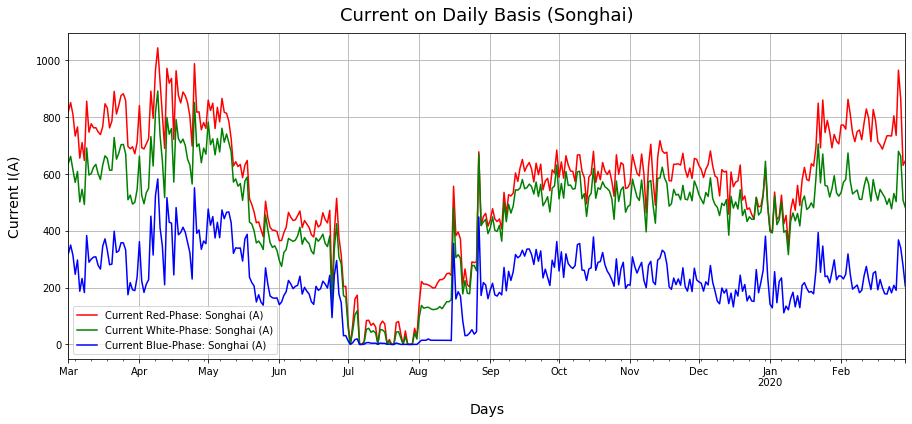

In [56]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
C_ds3.plot(kind='line', y=['Current Red-Phase: Songhai (A)', 'Current White-Phase: Songhai (A)',
       'Current Blue-Phase: Songhai (A)'], color=['red', 'green','blue'], ax=ax)

plt.title("Current on Daily Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Current I(A)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

In [57]:
# Phase percentage of the total power consumed per premise
# Sum total of each phase devided by the sum total of all phases in that particular premise
R_phase_A = (C_1['Current Red-Phase: Aksum (A)'].sum()/C_1.sum().sum()) * 100 # 44.28 % of the total power
W_phase_A = (C_1['Current White-Phase: Aksum (A)'].sum()/C_1.sum().sum()) * 100 # 29.50 % of the total power
B_phase_A = (C_1['Current Blue-Phase: Aksum (A)'].sum()/C_1.sum().sum()) * 100 # 26.22 % of the total power

R_phase_M = (C_2['Current Red-Phase: Maps (A)'].sum()/C_2.sum().sum()) * 100 # 42.06 % of the total power
W_phase_M = (C_2['Current White-Phase: Maps (A)'].sum()/C_2.sum().sum()) * 100 # 35.05 % of the total power
B_phase_M = (C_2['Current Blue-Phase: Maps (A)'].sum()/C_2.sum().sum()) * 100 # 22.88 % of the total power

R_phase_S = (C_3['Current Red-Phase: Songhai (A)'].sum()/C_3.sum().sum()) * 100 # 44.80 % of the total power
W_phase_S = (C_3['Current White-Phase: Songhai (A)'].sum()/C_3.sum().sum()) * 100 # 37.28 % of the total power
B_phase_S = (C_3['Current Blue-Phase: Songhai (A)'].sum()/C_3.sum().sum()) * 100 # 17.91 % of the total power

print('Red-phase Aksum: ' + str(R_phase_A) + '%' + ' ' + 'Red-phase Maps: ' + str(R_phase_M) + '%' + ' ' + str(R_phase_S) + '%' +
     str(W_phase_A) + '%' + ' '+ str(W_phase_M) + '%' + ' '+ str(W_phase_S) + '%' + 
     str(B_phase_A) + '%' + ' '+ str(B_phase_M) + '%' + ' '+ str(B_phase_S) + '%')

Red-phase Aksum: 44.27774106826563% Red-phase Maps: 42.06413964958571% 44.80460316911925%29.50129233918656% 35.05274127892196% 37.281975778482376%26.22096659254786% 22.8831190714924% 17.91342105239847%


In [58]:
# Calculating Phase unbalance
C_1['Mean'] = C_1.mean(axis=1) # Finding the mean or average of the 3-phase current ); use rows
C_1['Max Deviation'] = C_1.max(axis=1) - C_1.mean(axis=1) # Finding the max deviation from the mean

C_2['Mean'] = C_2.mean(axis=1) # Finding the mean or average of the 3-phase current ); use rows
C_2['Max Deviation'] = C_2.max(axis=1) - C_2.mean(axis=1) # Finding the max deviation from the mean

C_3['Mean'] = C_3.mean(axis=1) # Finding the mean or average of the 3-phase current ); use rows
C_3['Max Deviation'] = C_3.max(axis=1) - C_3.mean(axis=1) # Finding the max deviation from the mean

## Phase imbalance formula
C_1['% Unbalance'] = 100 * (C_1['Max Deviation'] / C_1['Mean'])# Divide the max deviation by the mean to find the unbalance
#C_1.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\AK_Current.csv') # save it as csv file     

C_2['% Unbalance'] = 100 * (C_2['Max Deviation'] / C_2['Mean']) # Divide the max deviation by the mean to find the unbalance
#C_2.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\MA_Current.csv') # save it as csv file

C_3['% Unbalance'] = 100 * (C_3['Max Deviation'] / C_3['Mean']) # Divide the max deviation by the mean to find the unbalance
#C_3.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\SO_Current.csv') # save it as csv file


In [59]:
C_1.describe()# Getting some statistical summary for insights - 1 is for Aksum, 2 for Maps and 3 for Songhai
display(C_3)# It is the same the as print function in general terms

## Print the whole dataset/dataframe
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(C_3.reset_index()) # reset_index() is used to the idx and use it in the iloc function if necessary


,Current Red-Phase: Songhai (A),Current White-Phase: Songhai (A),Current Blue-Phase: Songhai (A),Mean,Max Deviation,% Unbalance
Date,,,,,,
2019-03-01 00:00:00,49.3,42.4,29.6,40.433333,8.866667,21.929101
2019-03-01 01:00:00,46.9,40.0,27.0,37.966667,8.933333,23.529412
2019-03-01 02:00:00,42.8,35.6,22.9,33.766667,9.033333,26.752221
2019-03-01 03:00:00,34.9,27.0,14.4,25.433333,9.466667,37.221494
2019-03-01 04:00:00,28.9,22.3,9.3,20.166667,8.733333,43.305785
...,...,...,...,...,...,...
2020-02-29 19:00:00,27.7,21.0,6.4,18.366667,9.333333,50.816697
2020-02-29 20:00:00,26.0,20.0,5.4,17.133333,8.866667,51.750973
2020-02-29 21:00:00,35.1,28.7,11.3,25.033333,10.066667,40.213049


In [60]:
C_3.iloc[8438] # Find the information regarding this idx
C_3['Max Deviation'].max()

19.899999999999995

# Frequency Analysis - Section 3

In [61]:
## Group the data by time period - Initial Analysis
F_t = F_1.resample('M').sum() # sum of data on montly basis

F_t2 = F_2.resample('M').sum() # sum of data on montly basis
F_d2 = F_2.resample('M').mean() # sum of data on montly basis

F_t3 = F_3.resample('M').sum() # sum of data on montly basis

F_ds = F_1.resample('D').sum()# sum of the data on daily basis

F_ds2 = F_2.resample('D').sum()# sum of the data on daily basis

F_ds3 = F_3.resample('D').sum()# sum of the data on daily basis

F_ws = F_1.resample('W').sum() # sum of the data on weekly basis

F_ws2 = F_2.resample('W').sum()# sum of the data on weekly basis

F_ws3 = F_3.resample('W').sum()# sum of the data on weekly basis

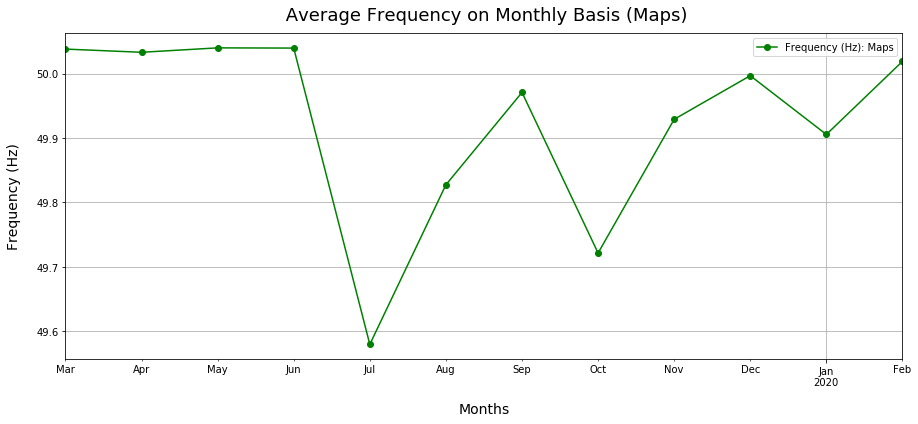

In [62]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
F_d2.plot(kind='line', y=['Frequency (Hz): Maps'], color='green',marker='o', ax=ax)

plt.title(" Average Frequency on Monthly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Frequency (Hz)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Frequency_sumMA.jpg')# uncomment to save the image


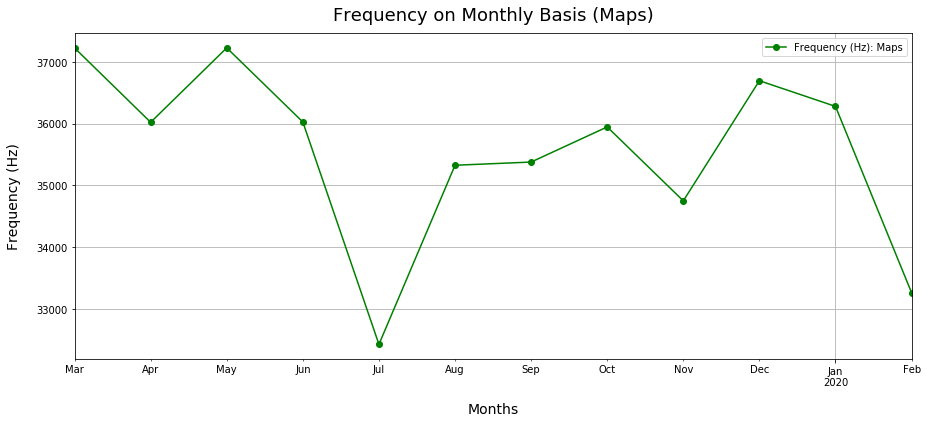

In [63]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
F_t2.plot(kind='line', y=['Frequency (Hz): Maps'], color='green',marker='o', ax=ax)

plt.title("Frequency on Monthly Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Frequency (Hz)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Frequency_sumMA.jpg')# uncomment to save the image

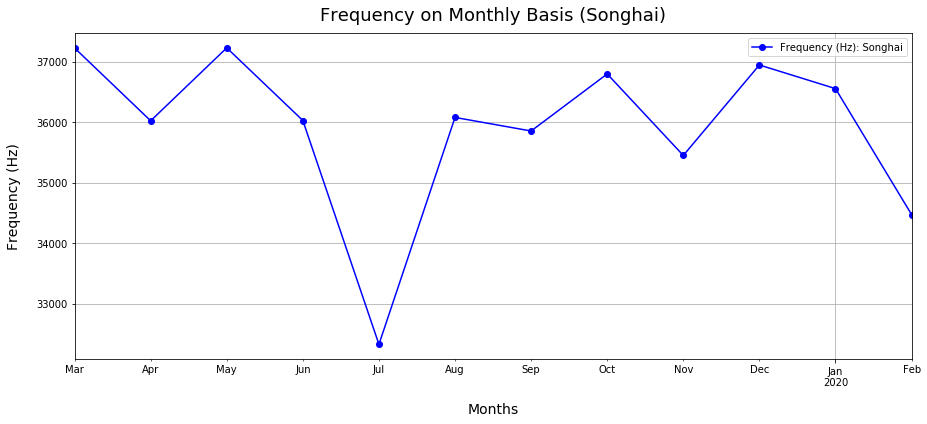

In [64]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
F_t3.plot(kind='line', y=['Frequency (Hz): Songhai'], color='blue',marker='o', ax=ax)

plt.title("Frequency on Monthly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Frequency (Hz)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Frequency_sumSO.jpg')# uncomment to save the image


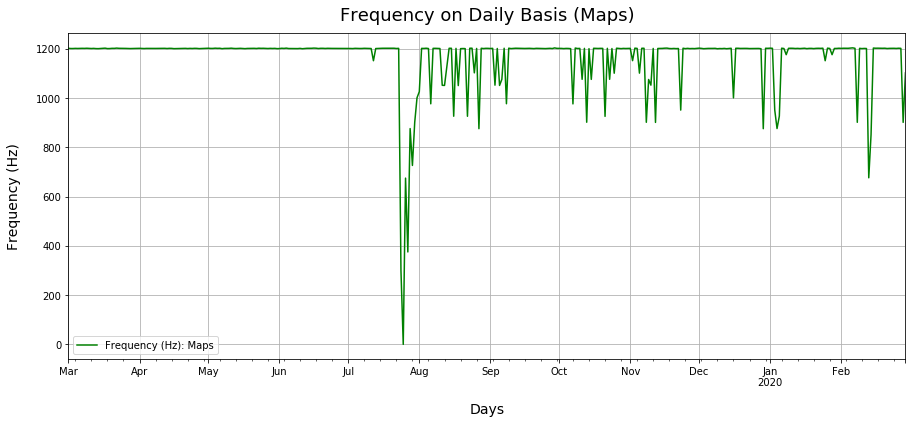

In [65]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
F_ds2.plot(kind='line', y=['Frequency (Hz): Maps'], color='green', ax=ax)

plt.title("Frequency on Daily Basis (Maps)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Frequency (Hz)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Frequency_sumDMAPS.jpg')# uncomment to save the image

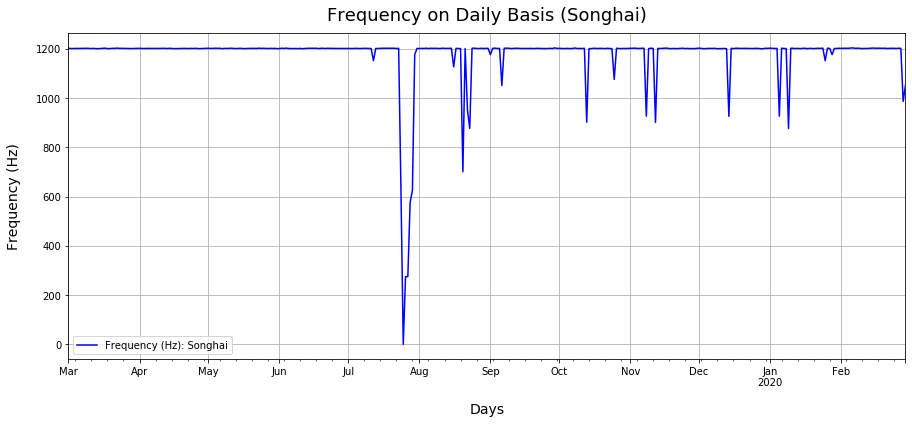

In [66]:
# Plotting and further analysis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
F_ds3.plot(kind='line', y=['Frequency (Hz): Songhai'], color='blue', ax=ax)

plt.title("Frequency on Daily Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Frequency (Hz)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Frequency_sumDSO.jpg')# uncomment to save the image

In [67]:
## Correlation and 
#Corr1 = premise1.corr().copy()
Corr2 = premise2.corr().copy()
Corr3 = premise3.corr().copy()

# Variables
#Aksum_curr = Corr1[['Frequency (Hz): Aksum']] 
Maps_corr = Corr2[['Frequency (Hz): Maps']] 
Songhai_corr = Corr3[['Frequency (Hz): Songhai']]

# Getting the correlation table showing only the voltage and the frequency
#Table1 = Aksum_curr[:3]
Table2 = Maps_corr[:3]
Table3 = Songhai_corr[:3]

In [68]:
Table3

,Frequency (Hz): Songhai
Voltage Red-Phase: Songhai (V),0.987526
Voltage White-Phase: Songhai (V),0.987124
Voltage Blue-Phase: Songhai (V),0.987776


In [69]:
F_2.max() # 50.3
F_2.min() # 24.9
F_2.mean() # 49.9

Frequency (Hz): Maps    49.927786
dtype: float64

In [70]:
F_2.describe()

,Frequency (Hz): Maps
count,8544.000000
mean,49.927786
std,1.667697
min,24.900000
25%,50.000000
50%,50.000000
75%,50.100000
max,50.300000


In [71]:
F_3.describe()

,Frequency (Hz): Songhai
count,8622.000000
mean,49.988147
std,1.537051
min,25.000000
25%,50.000000
50%,50.000000
75%,50.100000
max,134.900000


In [72]:
F_first = pd.to_numeric(F_1['Frequency (Hz): Aksum'], errors = 'coerce')#.describe()

In [73]:
F_first
F_0 = pd.DataFrame({'Date':F_first.index, 'Frequency (Hz): Aksum':F_first.values})

In [74]:
F_0.index = F_0['Date']

In [75]:
F_first = pd.to_numeric(F_1['Frequency (Hz): Aksum'], errors = 'coerce')#.describe()

In [76]:
premise1[["Frequency (Hz): Aksum", "Temperature (deg C)"]] = premise1[["Frequency (Hz): Aksum", "Temperature (deg C)"]].apply(pd.to_numeric, errors='coerce')

In [77]:
## Print the whole dataset/dataframe
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(premise3[["Frequency (Hz): Songhai"]]>50.2) # reset_index() is used to the idx and use it in the iloc function if necessary


In [78]:
premise1.iloc[8475]

Date                                        2020-02-17 03:00:00
Voltage Red-Phase: Aksum (V)                              237.3
Voltage White-Phase: Aksum (V)                            237.3
Voltage Blue-Phase: Aksum (V)                             236.9
Current Red-Phase: Aksum (A)                                 32
Current White-Phase: Aksum (A)                             21.9
Current Blue-Phase: Aksum (A)                              16.4
Total Active Power (kW): Aksum                             16.2
Active Power Red-Phase: Aksum (kW)                          7.3
Active Power White-Phase: Aksum (kW)                          5
Active Power Blue-Phase: Aksum (kW)                         3.9
Total Reactive Power (kVAr)                                -3.6
Reactive Power Red-Phase: Aksum (kVAr)                     -1.9
Reactive Power White-Phase: Aksum (kVAr)                   -1.2
Reactive Power Blue-Phase: Aksum (kVAr)                    -0.5
Total Demand (kVA)                      

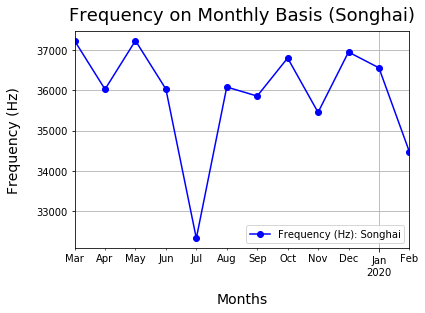

In [79]:
# Plotting and further analysis
#fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Daily basis - Voltage graphs for sum
F_t3.plot(kind='line', y=['Frequency (Hz): Songhai'], color='blue',marker='o', ax=ax)

plt.title("Frequency on Monthly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Frequency (Hz)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Frequency_sumSO.jpg')# uncomment to save the image


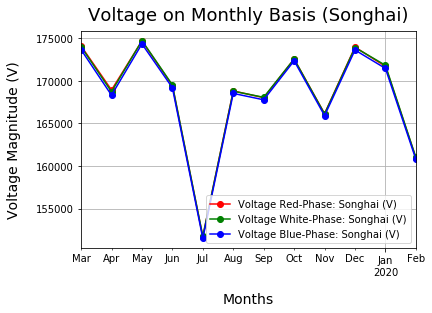

In [80]:
#fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis

V_t3.plot(kind='line', y=['Voltage Red-Phase: Songhai (V)', 'Voltage White-Phase: Songhai (V)',
       'Voltage Blue-Phase: Songhai (V)'], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Monthly Basis (Songhai)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image